In [37]:
# 조윤주, 이창욱 

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c goormcompetition

goormcompetition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import os 
from zipfile import ZipFile
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

os.listdir()

['result_japall.csv',
 'winequality-red.csv',
 '2_trial.csv',
 'rapids.ipynb',
 'Joycity.ipynb',
 'winequality-red_test.csv',
 'This dataset contains logs obtained from Criteo Predictive Search.docx',
 'Untitled.ipynb',
 'word2vec-nlp-tutorial.zip',
 'red_wine.ipynb',
 'V03-Copy1.ipynb',
 'V01.ipynb',
 'Untitled2.ipynb',
 'kaggle.json',
 'data',
 'tmp',
 'Untitled1.ipynb',
 'joycity2.ipynb',
 'result.csv',
 'joycity.csv',
 'goormcompetition.zip',
 '.ipynb_checkpoints',
 'V02.ipynb',
 'V03.ipynb',
 'Criteo_Conversion_Search.tar.gz',
 'Criteo_Conversion_Search',
 'results',
 'Joycity-V02.ipynb']

In [3]:
file_name = 'goormcompetition.zip'

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('done')

df = pd.read_csv('winequality-red.csv')
df.head()

df.info()

bins = (0, 5, 10)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])

q = df['fixed acidity'].quantile(0.90)
df = df[df['fixed acidity'] < q]

q = df['volatile acidity'].quantile(0.90)
df = df[df['volatile acidity'] < q]

q = df['citric acid'].quantile(0.90)
df = df[df['citric acid'] < q]
q = df['citric acid'].quantile(0.10)
df = df[df['citric acid'] > q]

q = df['residual sugar'].quantile(0.90)
df = df[df['residual sugar'] < q]

q = df['chlorides'].quantile(0.90)
df = df[df['chlorides'] < q]

q = df['free sulfur dioxide'].quantile(0.90)
df = df[df['free sulfur dioxide'] < q]

q = df['total sulfur dioxide'].quantile(0.90)
df = df[df['total sulfur dioxide'] < q]

q = df['density'].quantile(0.1)
df = df[df['density'] > q]

q = df['pH'].quantile(0.90)
df = df[df['pH'] < q]

q = df['sulphates'].quantile(0.90)
df = df[df['sulphates'] < q]

q = df['alcohol'].quantile(0.90)
df = df[df['alcohol'] < q]
q = df['alcohol'].quantile(0.10)
df = df[df['alcohol'] > q]

x = df.drop('quality', axis = 1)
y = df['quality']

done
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1439 non-null   float64
 1   volatile acidity      1439 non-null   float64
 2   citric acid           1439 non-null   float64
 3   residual sugar        1439 non-null   float64
 4   chlorides             1439 non-null   float64
 5   free sulfur dioxide   1439 non-null   float64
 6   total sulfur dioxide  1439 non-null   float64
 7   density               1439 non-null   float64
 8   pH                    1439 non-null   float64
 9   sulphates             1439 non-null   float64
 10  alcohol               1439 non-null   float64
 11  quality               1439 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 135.0 KB


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

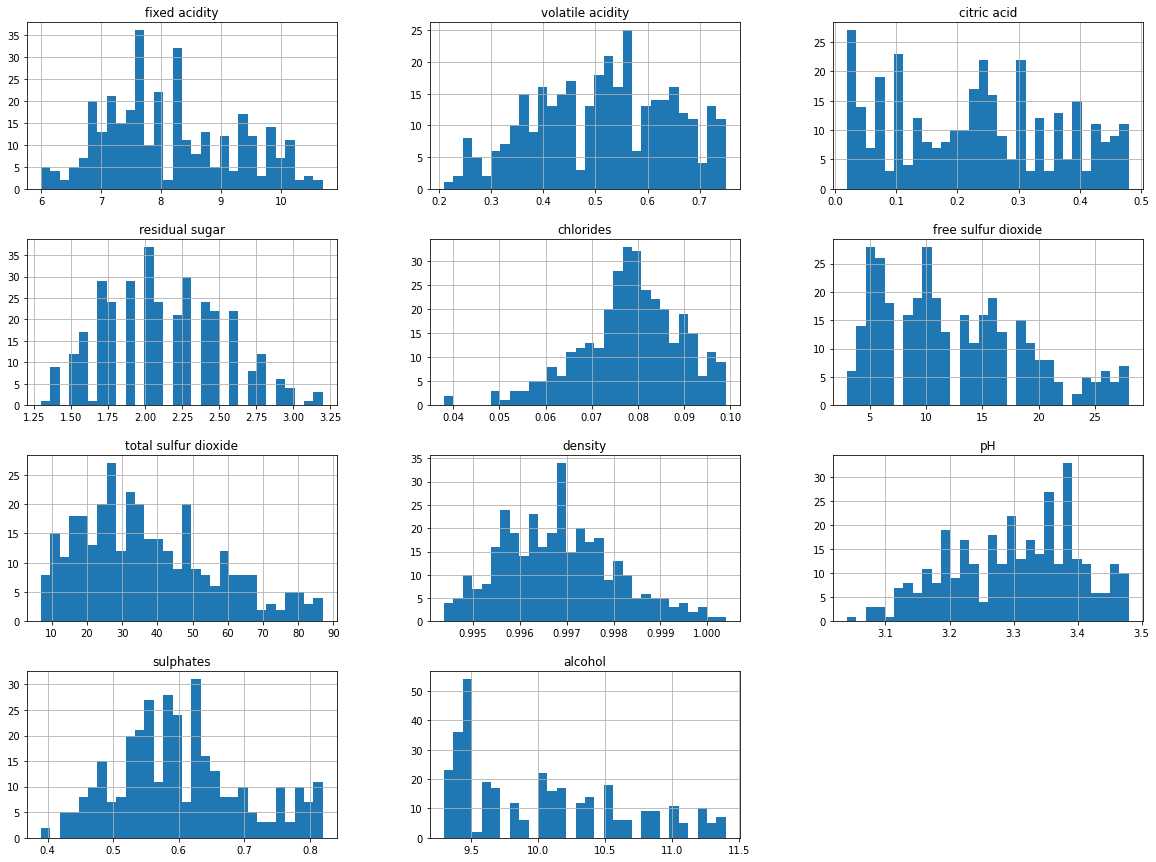

In [4]:
x.hist(bins = 30, figsize = (20, 15))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 42, shuffle = False)

In [6]:
x_train = x_train.apply(lambda x: (x - np.mean(x))/np.std(x), axis = 0)
x_test = x_test.apply(lambda x: (x - np.mean(x))/np.std(x), axis = 0)

In [7]:
model = LogisticRegression().fit(x_train, y_train)
feature_importance = model.coef_[0]
for feature, percentage in enumerate(feature_importance):
    print('{}번 째 feature는 {}의 importance를 가지고 있다'.format(feature+1, round(percentage,2)))

1번 째 feature는 1.2의 importance를 가지고 있다
2번 째 feature는 -1.04의 importance를 가지고 있다
3번 째 feature는 -0.25의 importance를 가지고 있다
4번 째 feature는 0.5의 importance를 가지고 있다
5번 째 feature는 0.6의 importance를 가지고 있다
6번 째 feature는 0.26의 importance를 가지고 있다
7번 째 feature는 -0.99의 importance를 가지고 있다
8번 째 feature는 -0.12의 importance를 가지고 있다
9번 째 feature는 0.68의 importance를 가지고 있다
10번 째 feature는 0.7의 importance를 가지고 있다
11번 째 feature는 0.33의 importance를 가지고 있다


In [8]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
6,0.362876,0.480369,-1.057552,-1.348580,-0.901391,0.661063,1.101570,-0.189598,-0.521272,-1.458170,-0.925804
8,0.242516,0.321039,-1.400265,-0.167471,-0.471546,-0.509630,-1.268057,0.359724,0.179568,-0.303851,-0.691733
23,1.085037,-0.395948,-0.629160,0.718361,0.710527,-0.509630,1.563937,0.359724,-2.039758,-0.723603,-0.925804
24,-0.840724,-1.112934,-0.372125,1.013639,0.817989,1.831757,0.003450,0.359724,0.997215,0.325778,-0.223590
25,-1.562884,-1.192599,-0.200769,-1.939135,0.280682,-0.119399,-0.979078,-1.425575,-0.054045,-0.408789,-1.159875


<AxesSubplot:>

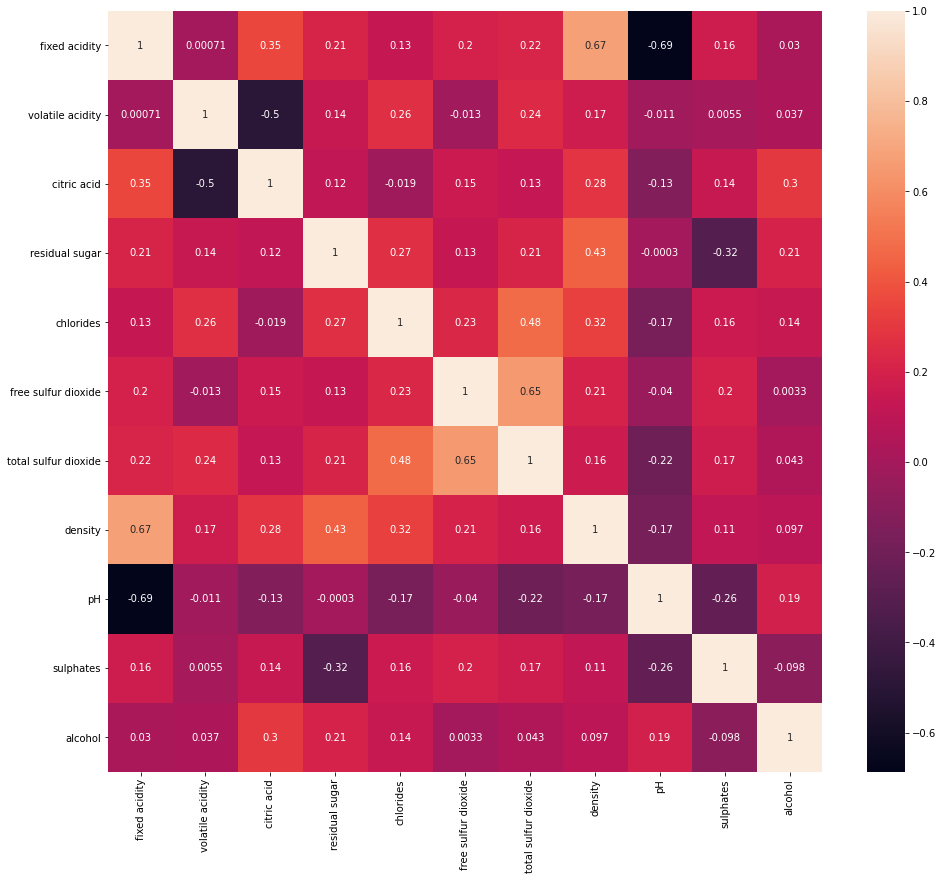

In [9]:
plt.figure(figsize=(16,14))
sns.heatmap(x_train.corr(), annot=True)

In [10]:
x_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [11]:
x_train_new = x_train.drop(['volatile acidity', 'fixed acidity',], axis = 1) # residual
x_test_new = x_test.drop(['volatile acidity', 'fixed acidity', ], axis = 1)
model = LogisticRegression(C = 0.09999999999999673, l1_ratio= 0.0).fit(x_train_new, y_train)
model.score(x_test_new, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


0.6133828996282528

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

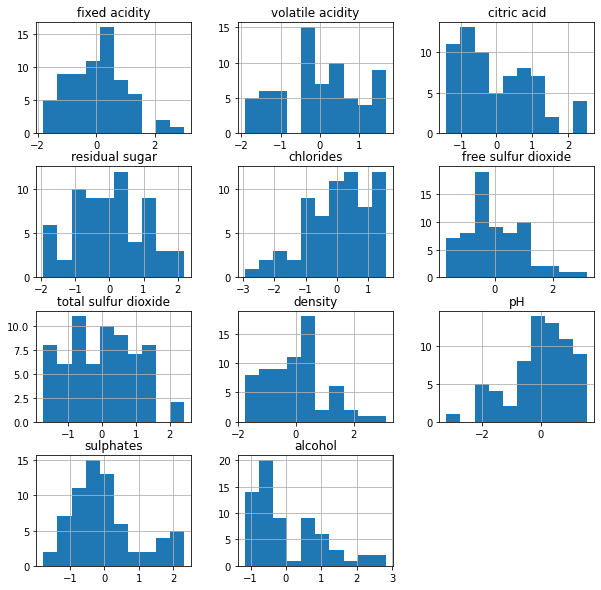

In [12]:
x_train.hist(figsize = (10, 10))

In [24]:
x_train_new = x_train.drop(['residual sugar'], axis = 1) # residual
x_test_new = x_test.drop(['residual sugar'], axis = 1)
model = LogisticRegression().fit(x_train_new, y_train)
model.score(x_test_new, y_test)

0.6394052044609665

In [25]:
x_train_new = x_train.drop(['free sulfur dioxide'], axis = 1) # free sulfur
x_test_new = x_test.drop(['free sulfur dioxide'], axis = 1)
model = LogisticRegression().fit(x_train_new, y_train)
model.score(x_test_new, y_test)

0.6431226765799256

In [26]:
x_train_new = x_train.drop(['free sulfur dioxide', 'residual sugar'], axis = 1) # density
x_test_new = x_test.drop(['free sulfur dioxide', 'residual sugar'], axis = 1)
model = LogisticRegression().fit(x_train_new, y_train)
model.score(x_test_new, y_test)

0.6356877323420075

In [27]:
x_train_new = x_train.drop(['density'], axis = 1) # density
x_test_new = x_test.drop(['density'], axis = 1)
model = LogisticRegression().fit(x_train_new, y_train)
model.score(x_test_new, y_test)

0.654275092936803

In [28]:
x_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [29]:
x_train_new = x_train.drop(['pH'], axis = 1) # pH
x_test_new = x_test.drop(['pH'], axis = 1)
model = LogisticRegression().fit(x_train_new, y_train)
model.score(x_test_new, y_test)

0.6468401486988847

In [33]:
param_grid = {
    'C': 10.0**np.arange(-5, 2, step = 0.1),
    'l1_ratio': np.arange(0, 1, step = 0.01)
}

lr_cv = LogisticRegression(penalty = 'elasticnet', solver = 'saga',
                              max_iter = 1e3, random_state = 42)
grid_search = GridSearchCV(lr_cv, param_grid, 
                          cv = 5, 
                          scoring = 'accuracy',
                          n_jobs = 10)
grid_search.fit(x_train_new, y_train)
best = grid_search.best_params_
best

{'C': 1.584893192461046, 'l1_ratio': 0.96}

In [20]:
submit_data = pd.read_csv('winequality-red_test.csv')
submit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         160 non-null    float64
 1   volatile acidity      160 non-null    float64
 2   citric acid           160 non-null    float64
 3   residual sugar        160 non-null    float64
 4   chlorides             160 non-null    float64
 5   free sulfur dioxide   160 non-null    int64  
 6   total sulfur dioxide  160 non-null    int64  
 7   density               160 non-null    float64
 8   pH                    160 non-null    float64
 9   sulphates             160 non-null    float64
 10  alcohol               160 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 13.9 KB


In [1]:
x_train_new = x_train.drop(['density'], axis = 1)
submit_data_new = submit_data.drop(['density'], axis = 1)

model = LogisticRegression(C = 1.584, l1_ratio = 0.96).fit(x_train_new, y_train)
y_pred = model.predict(submit_data_new)
submit_data_new['quality'] = y_pred
submit_data_new.to_csv('result.csv' )

NameError: name 'x_train' is not defined

In [35]:
submit_data_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.3,0.670,0.02,2.20,0.072,31,92,3.32,0.68,11.066667,0
1,7.2,0.370,0.32,2.00,0.062,15,28,3.23,0.73,11.300000,0
2,7.4,0.785,0.19,5.20,0.094,19,98,3.16,0.52,9.566667,0
3,6.9,0.630,0.02,1.90,0.078,18,30,3.40,0.75,9.800000,0
4,6.9,0.580,0.20,1.75,0.058,8,22,3.38,0.49,11.700000,0
...,...,...,...,...,...,...,...,...,...,...,...
155,6.2,0.600,0.08,2.00,0.090,32,44,3.45,0.58,10.500000,0
156,5.9,0.550,0.10,2.20,0.062,39,51,3.52,0.76,11.200000,0
157,6.3,0.510,0.13,2.30,0.076,29,40,3.42,0.75,11.000000,0
158,5.9,0.645,0.12,2.00,0.075,32,44,3.57,0.71,10.200000,0


In [36]:
submit_data_new['quality'].value_counts()

0    137
1     23
Name: quality, dtype: int64